In [1]:
from collections import Counter
from gensim.corpora import Dictionary
from nltk import ngrams
from scipy import stats

import itertools
import numpy as np
import os
import pybo

import matplotlib.pyplot as plt
%matplotlib inline

Store texts in the following directory structure:

    texts
      Nyingma-GN
        file1.txt
        file2.txt
        ...
      Nyingma
        file1.txt
        file2.txt
        ...

In [2]:
tok = pybo.BoTokenizer('POS')

Loading Trie...
Time: 5.875126838684082


Assumptions here:
1. Drop all non-bo text
2. Drop all phrase delimiters (shad)
3. Reduce words to lemmas
4. Strip beginning and ending tseks from lemmas

In [18]:
tsek = '་'

# Create dictionary to map document index back to filename
GN_idx2fname = {}
GN_texts = []
for filename in sorted(os.listdir("texts/Nyingma-GN")):
    if ".txt" in filename:
        with open("texts/Nyingma-GN/" + filename, 'r', encoding='utf-8-sig') as f:
            GN_idx2fname[len(GN_texts)] = filename
            tokens = [t for t in tok.tokenize(f.read()) if t.type != "non-bo" and t.pos != "punct"]
            lemmas = [t.lemma.strip(tsek) if t.lemma else t.content.strip(tsek) for t in tokens]
            GN_texts.append(lemmas)
            
# Now process nyingma
idx2fname = {}
texts = []
for filename in sorted(os.listdir("texts/Nyingma-tmp")):
    if ".txt" in filename:
        with open("texts/Nyingma-tmp/" + filename, 'r', encoding='utf-8-sig') as f:
            idx2fname[len(texts)] = filename
            tokens = [t for t in tok.tokenize(f.read()) if t.type != "non-bo" and t.pos != "punct"]
            lemmas = [t.lemma.strip(tsek) if t.lemma else t.content.strip(tsek) for t in tokens]
            texts.append(lemmas)

## Part 1: Pairwise cosine similarity of term frequency vectors (filtered)

In [19]:
filter_list = ['གི','ལ','གིས','དང','ནི','ནས','པ','གོ','ཀྱང','དུ','ཀྱིས','དེ','ཏེ','མ','སྟེ','སུ','ཀྱི','གྱིས','ན','ཅེས','འདི','གྱི','ཅི','བ','པར','ཡིས','ཅིང','མོ','ཅེས་པ','རྣམས','ཏུ']

GN_texts_f = []
for t in GN_texts:
    t_f = [x for x in t if x not in filter_list]
    GN_texts_f.append(t_f)

texts_f = []
for t in texts:
    t_f = [x for x in t if x not in filter_list]
    texts_f.append(t_f)

dct_f = Dictionary(GN_texts_f + texts_f)

GN_bows_f = []
for t in GN_texts_f:
    GN_bows_f.append(dct_f.doc2bow(t))
    
bows_f = []
for t in texts_f:
    bows_f.append(dct_f.doc2bow(t))
    
GN_tfs_f = []
for t in GN_bows_f:
    vec = np.zeros(len(dct_f))
    for k, v in t:
        vec[k] = v
    GN_tfs_f.append(vec)
    
tfs_f = []
for t in bows_f:
    vec = np.zeros(len(dct_f))
    for k, v in t:
        vec[k] = v
    tfs_f.append(vec)

GN self similarity


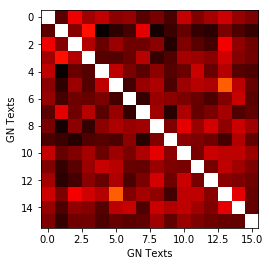

Nyingma similarity


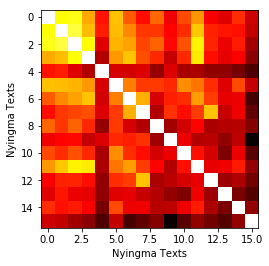

Cross similarity


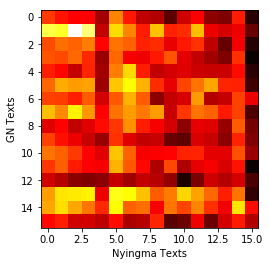

In [20]:
print("GN self similarity")
cos_sims_f = np.zeros((len(GN_tfs_f), len(GN_tfs_f)))

for i in range(len(GN_tfs_f)):
    for j in range(len(GN_tfs_f)):
        u = GN_tfs_f[i]
        v = GN_tfs_f[j]
        cos_sims_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))
        
plt.imshow(cos_sims_f, cmap='hot', interpolation='nearest')
plt.xlabel('GN Texts')
plt.ylabel('GN Texts')
plt.show()

print("Nyingma similarity")
cos_sims_f = np.zeros((len(tfs_f), len(tfs_f)))

for i in range(len(tfs_f)):
    for j in range(len(tfs_f)):
        u = tfs_f[i]
        v = tfs_f[j]
        cos_sims_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))
        
plt.imshow(cos_sims_f, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('Nyingma Texts')
plt.show()

print("Cross similarity")
cos_sims_f = np.zeros((len(GN_tfs_f), len(tfs_f)))

for i in range(len(GN_tfs_f)):
    for j in range(len(tfs_f)):
        u = GN_tfs_f[i]
        v = tfs_f[j]
        cos_sims_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))
        
plt.imshow(cos_sims_f, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('GN Texts')
plt.show()

In [21]:
GN_idx2fname

{0: 'L1_GN2-rig-pa-khu-byug.txt',
 1: 'L2_G5-rtsal-chen.txt',
 2: 'L3_GN1-khyung-chen.txt',
 3: 'L4_GN6-sems-sgom.txt',
 4: 'L5_GN3-nam-mkha-che.txt',
 5: 'LL01-GN-rtse-mo.txt',
 6: "LL02-GN_namkha'i-rgyal-po.txt",
 7: 'LL03-GN-12_bde-ba-phra-bkod.txt',
 8: 'LL04-GN11_spyi-chings.txt',
 9: "LL06_GN16-bde-ba-rab-'byams.txt",
 10: "LL07-GN13-srog-gi-'khor-lo.txt",
 11: 'LL08_GN4-thig-le-drug.txt',
 12: 'LL09_GN10-spyi-gcod.txt',
 13: 'LL10_GN8-yid-bzhin-nor-bu.txt',
 14: "LL11-GN14-kun-'dus.txt",
 15: 'LL12-GN18-rje-btsan-dam-pa.txt'}

In [22]:
idx2fname

{0: "L1-rig-pa'i-khu-byug_p302-324.txt",
 1: 'L2-rtsal-chen_p436-447་.txt',
 2: 'L3-khyung-chen_p447-468.txt',
 3: 'L4_byang-sems-bsgom-rdo-la-gser-zhun-p416-425.txt',
 4: "L5_nam-mkha'-che-rgyas-pa-yi-ge-med-pa_V8-p.468-473.txt",
 5: 'LL01_L14_rtse-mo-byung-rgyal_vol8-p480-491.txt',
 6: "LL02_་nam-mkha'-rgyal-po_vol8-v475-480.txt",
 7: 'LL03_L16_bde-ba-phra-bkod_V8-p.495-498.txt',
 8: 'LL05_spyi-bcings-spyi-chings_Liljenberg-p268ff.txt',
 9: "LL06_L15_bde-ba-rab-'byams_vol8-p.473-475-not-sure.txt",
 10: "LL07_L10_srog-gi-'khor-lo_v8.p491-494.txt",
 11: 'LL08_thig-le-drug-pa-NGB-vol33.txt',
 12: 'LL09_spyi-gcod_vol8_p.498.txt',
 13: 'LL10_yid-bzhin-nor-bu-431.txt',
 14: "LL11_kun-'dus-NGB-mtshams-brag-vol1-624-626་.txt",
 15: 'LL12_rje-btsan-dam-pa_NGB-vol34-p63-64.txt'}

## Part 2: Pairwise cosine similarity of bigram frequency vectors (filtered)

GN self similarity


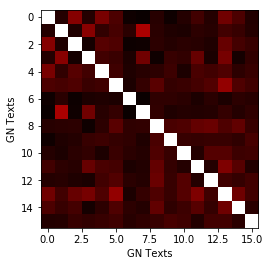

Nyingma self similarity


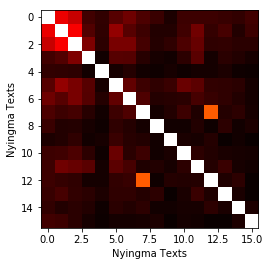

Cross similarity


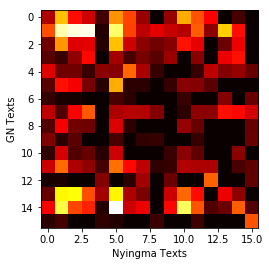

In [24]:
GN_bigrams_f = []
for t in GN_texts:
    grams = [tsek.join(x) for x in ngrams(t, 2) if not set(x).intersection(filter_list)]
    GN_bigrams_f.append(grams)
    
bigrams_f = []
for t in texts:
    grams = [tsek.join(x) for x in ngrams(t, 2) if not set(x).intersection(filter_list)]
    bigrams_f.append(grams)
    
dct_bigrams_f = Dictionary(GN_bigrams_f + bigrams_f)

GN_bows_bigrams_f = []
for t in GN_bigrams_f:
    GN_bows_bigrams_f.append(dct_bigrams_f.doc2bow(t))
    
bows_bigrams_f = []
for t in bigrams_f:
    bows_bigrams_f.append(dct_bigrams_f.doc2bow(t))
    
GN_tfs_bigrams_f = []
for t in GN_bows_bigrams_f:
    vec = np.zeros(len(dct_bigrams_f))
    for k, v in t:
        vec[k] = v
    GN_tfs_bigrams_f.append(vec)
    
tfs_bigrams_f = []
for t in bows_bigrams_f:
    vec = np.zeros(len(dct_bigrams_f))
    for k, v in t:
        vec[k] = v
    tfs_bigrams_f.append(vec)

print("GN self similarity")
cos_sims_bigrams_f = np.zeros((len(GN_tfs_bigrams_f), len(GN_tfs_bigrams_f)))

for i in range(len(GN_tfs_bigrams_f)):
    for j in range(len(GN_tfs_bigrams_f)):
        u = GN_tfs_bigrams_f[i]
        v = GN_tfs_bigrams_f[j]
        cos_sims_bigrams_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))

plt.imshow(cos_sims_bigrams_f, cmap='hot', interpolation='nearest')
plt.xlabel('GN Texts')
plt.ylabel('GN Texts')
plt.show()

print("Nyingma self similarity")
cos_sims_bigrams_f = np.zeros((len(tfs_bigrams_f), len(tfs_bigrams_f)))

for i in range(len(tfs_bigrams_f)):
    for j in range(len(tfs_bigrams_f)):
        u = tfs_bigrams_f[i]
        v = tfs_bigrams_f[j]
        cos_sims_bigrams_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))

plt.imshow(cos_sims_bigrams_f, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('Nyingma Texts')
plt.show()

print("Cross similarity")
cos_sims_bigrams_f = np.zeros((len(GN_tfs_bigrams_f), len(tfs_bigrams_f)))

for i in range(len(GN_tfs_bigrams_f)):
    for j in range(len(tfs_bigrams_f)):
        u = GN_tfs_bigrams_f[i]
        v = tfs_bigrams_f[j]
        cos_sims_bigrams_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))

plt.imshow(cos_sims_bigrams_f, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('GN Texts')
plt.show()

In [25]:
GN_idx2fname

{0: 'L1_GN2-rig-pa-khu-byug.txt',
 1: 'L2_G5-rtsal-chen.txt',
 2: 'L3_GN1-khyung-chen.txt',
 3: 'L4_GN6-sems-sgom.txt',
 4: 'L5_GN3-nam-mkha-che.txt',
 5: 'LL01-GN-rtse-mo.txt',
 6: "LL02-GN_namkha'i-rgyal-po.txt",
 7: 'LL03-GN-12_bde-ba-phra-bkod.txt',
 8: 'LL04-GN11_spyi-chings.txt',
 9: "LL06_GN16-bde-ba-rab-'byams.txt",
 10: "LL07-GN13-srog-gi-'khor-lo.txt",
 11: 'LL08_GN4-thig-le-drug.txt',
 12: 'LL09_GN10-spyi-gcod.txt',
 13: 'LL10_GN8-yid-bzhin-nor-bu.txt',
 14: "LL11-GN14-kun-'dus.txt",
 15: 'LL12-GN18-rje-btsan-dam-pa.txt'}

In [26]:
idx2fname

{0: "L1-rig-pa'i-khu-byug_p302-324.txt",
 1: 'L2-rtsal-chen_p436-447་.txt',
 2: 'L3-khyung-chen_p447-468.txt',
 3: 'L4_byang-sems-bsgom-rdo-la-gser-zhun-p416-425.txt',
 4: "L5_nam-mkha'-che-rgyas-pa-yi-ge-med-pa_V8-p.468-473.txt",
 5: 'LL01_L14_rtse-mo-byung-rgyal_vol8-p480-491.txt',
 6: "LL02_་nam-mkha'-rgyal-po_vol8-v475-480.txt",
 7: 'LL03_L16_bde-ba-phra-bkod_V8-p.495-498.txt',
 8: 'LL05_spyi-bcings-spyi-chings_Liljenberg-p268ff.txt',
 9: "LL06_L15_bde-ba-rab-'byams_vol8-p.473-475-not-sure.txt",
 10: "LL07_L10_srog-gi-'khor-lo_v8.p491-494.txt",
 11: 'LL08_thig-le-drug-pa-NGB-vol33.txt',
 12: 'LL09_spyi-gcod_vol8_p.498.txt',
 13: 'LL10_yid-bzhin-nor-bu-431.txt',
 14: "LL11_kun-'dus-NGB-mtshams-brag-vol1-624-626་.txt",
 15: 'LL12_rje-btsan-dam-pa_NGB-vol34-p63-64.txt'}

## Part 3: Pairwise cosine similarity of word + bigram frequency vectors (filtered)

GN self similarity


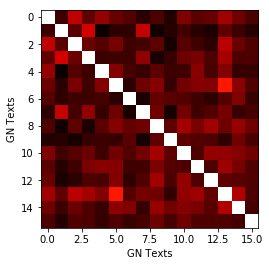

Nyingma self similarity


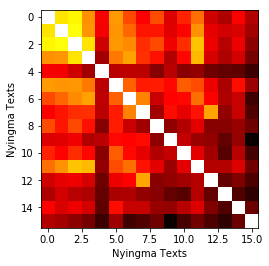

Cross similarity


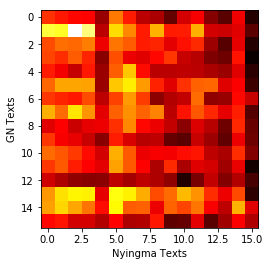

In [30]:
GN_words_bigrams_f = []
for t1, t2 in zip(GN_texts_f, GN_bigrams_f):
    GN_words_bigrams_f.append(t1 + t2)
    
words_bigrams_f = []
for t1, t2 in zip(texts_f, bigrams_f):
    words_bigrams_f.append(t1 + t2)
    
dct_words_bigrams_f = Dictionary(GN_words_bigrams_f + words_bigrams_f)

GN_bows_words_bigrams_f = []
for t in GN_words_bigrams_f:
    GN_bows_words_bigrams_f.append(dct_words_bigrams_f.doc2bow(t))
    
bows_words_bigrams_f = []
for t in words_bigrams_f:
    bows_words_bigrams_f.append(dct_words_bigrams_f.doc2bow(t))
    
GN_tfs_words_bigrams_f = []
for t in GN_bows_words_bigrams_f:
    vec = np.zeros(len(dct_words_bigrams_f))
    for k, v in t:
        vec[k] = v
    GN_tfs_words_bigrams_f.append(vec)
    
tfs_words_bigrams_f = []
for t in bows_words_bigrams_f:
    vec = np.zeros(len(dct_words_bigrams_f))
    for k, v in t:
        vec[k] = v
    tfs_words_bigrams_f.append(vec)

    
print("GN self similarity")
cos_sims_words_bigrams_f = np.zeros((len(GN_tfs_words_bigrams_f), len(GN_tfs_words_bigrams_f)))

for i in range(len(GN_tfs_words_bigrams_f)):
    for j in range(len(GN_tfs_words_bigrams_f)):
        u = GN_tfs_words_bigrams_f[i]
        v = GN_tfs_words_bigrams_f[j]
        cos_sims_words_bigrams_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))

plt.imshow(cos_sims_words_bigrams_f, cmap='hot', interpolation='nearest')
plt.xlabel('GN Texts')
plt.ylabel('GN Texts')
plt.show()


print("Nyingma self similarity")
cos_sims_words_bigrams_f = np.zeros((len(tfs_words_bigrams_f), len(tfs_words_bigrams_f)))

for i in range(len(tfs_words_bigrams_f)):
    for j in range(len(tfs_words_bigrams_f)):
        u = tfs_words_bigrams_f[i]
        v = tfs_words_bigrams_f[j]
        cos_sims_words_bigrams_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))

plt.imshow(cos_sims_words_bigrams_f, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('Nyingma Texts')
plt.show()


print("Cross similarity")
cos_sims_words_bigrams_f = np.zeros((len(GN_tfs_words_bigrams_f), len(tfs_words_bigrams_f)))

for i in range(len(GN_tfs_words_bigrams_f)):
    for j in range(len(tfs_words_bigrams_f)):
        u = GN_tfs_words_bigrams_f[i]
        v = tfs_words_bigrams_f[j]
        cos_sims_words_bigrams_f[i,j] = (u / np.linalg.norm(u)).dot(v / np.linalg.norm(v))

plt.imshow(cos_sims_words_bigrams_f, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('GN Texts')
plt.show()

In [31]:
GN_idx2fname

{0: 'L1_GN2-rig-pa-khu-byug.txt',
 1: 'L2_G5-rtsal-chen.txt',
 2: 'L3_GN1-khyung-chen.txt',
 3: 'L4_GN6-sems-sgom.txt',
 4: 'L5_GN3-nam-mkha-che.txt',
 5: 'LL01-GN-rtse-mo.txt',
 6: "LL02-GN_namkha'i-rgyal-po.txt",
 7: 'LL03-GN-12_bde-ba-phra-bkod.txt',
 8: 'LL04-GN11_spyi-chings.txt',
 9: "LL06_GN16-bde-ba-rab-'byams.txt",
 10: "LL07-GN13-srog-gi-'khor-lo.txt",
 11: 'LL08_GN4-thig-le-drug.txt',
 12: 'LL09_GN10-spyi-gcod.txt',
 13: 'LL10_GN8-yid-bzhin-nor-bu.txt',
 14: "LL11-GN14-kun-'dus.txt",
 15: 'LL12-GN18-rje-btsan-dam-pa.txt'}

In [32]:
idx2fname

{0: "L1-rig-pa'i-khu-byug_p302-324.txt",
 1: 'L2-rtsal-chen_p436-447་.txt',
 2: 'L3-khyung-chen_p447-468.txt',
 3: 'L4_byang-sems-bsgom-rdo-la-gser-zhun-p416-425.txt',
 4: "L5_nam-mkha'-che-rgyas-pa-yi-ge-med-pa_V8-p.468-473.txt",
 5: 'LL01_L14_rtse-mo-byung-rgyal_vol8-p480-491.txt',
 6: "LL02_་nam-mkha'-rgyal-po_vol8-v475-480.txt",
 7: 'LL03_L16_bde-ba-phra-bkod_V8-p.495-498.txt',
 8: 'LL05_spyi-bcings-spyi-chings_Liljenberg-p268ff.txt',
 9: "LL06_L15_bde-ba-rab-'byams_vol8-p.473-475-not-sure.txt",
 10: "LL07_L10_srog-gi-'khor-lo_v8.p491-494.txt",
 11: 'LL08_thig-le-drug-pa-NGB-vol33.txt',
 12: 'LL09_spyi-gcod_vol8_p.498.txt',
 13: 'LL10_yid-bzhin-nor-bu-431.txt',
 14: "LL11_kun-'dus-NGB-mtshams-brag-vol1-624-626་.txt",
 15: 'LL12_rje-btsan-dam-pa_NGB-vol34-p63-64.txt'}

## Part 4: Pairwise Spearman Rank Correlation of common words and 2-grams (filtered)

In [33]:
ctr_words_f = Counter()
for t in GN_texts_f + texts_f:
    ctr_words_f.update(t)
    
ctr_bigrams_f = Counter()
for t in GN_bigrams_f + bigrams_f:
    ctr_bigrams_f.update(t)

In [34]:
token2id = dct_words_bigrams_f.token2id
top_100_words = {token2id[x[0]] for x in ctr_words_f.most_common(100)}
top_1000_bigrams = {token2id[x[0]] for x in ctr_bigrams_f.most_common(1000)}

GN_trun_freq = []
for b in GN_bows_words_bigrams_f:
    vec = np.zeros(1100)
    i = 0
    for k, v in b:
        if k in top_100_words or k in top_1000_bigrams:
            vec[i] = v
            i += 1
    GN_trun_freq.append(vec)
            
trun_freq = []
for b in bows_words_bigrams_f:
    vec = np.zeros(1100)
    i = 0
    for k, v in b:
        if k in top_100_words or k in top_1000_bigrams:
            vec[i] = v
            i += 1
    trun_freq.append(vec)

GN self similarity


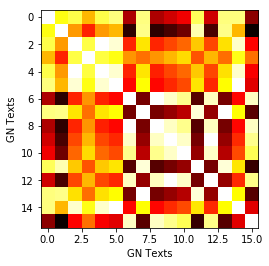

Nyingma self similarity


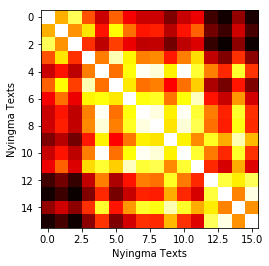

Cross similarity


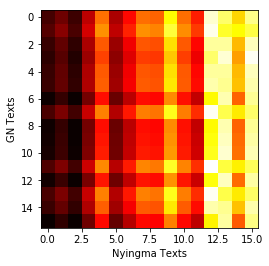

In [36]:
print("GN self similarity")
r_matrix = np.zeros((len(GN_texts), len(GN_texts)))

for i in range(len(GN_texts)):
    for j in range(len(GN_texts)):
        t, _ = stats.spearmanr(GN_trun_freq[i], GN_trun_freq[j])
        r_matrix[i, j] = t

plt.imshow(r_matrix, cmap='hot', interpolation='nearest')
plt.xlabel('GN Texts')
plt.ylabel('GN Texts')
plt.show()  


print("Nyingma self similarity")
r_matrix = np.zeros((len(texts), len(texts)))

for i in range(len(texts)):
    for j in range(len(texts)):
        t, _ = stats.spearmanr(trun_freq[i], trun_freq[j])
        r_matrix[i, j] = t

plt.imshow(r_matrix, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('Nyingma Texts')
plt.show()  


print("Cross similarity")
r_matrix = np.zeros((len(GN_texts), len(texts)))

for i in range(len(GN_texts)):
    for j in range(len(texts)):
        t, _ = stats.spearmanr(GN_trun_freq[i], trun_freq[j])
        r_matrix[i, j] = t

plt.imshow(r_matrix, cmap='hot', interpolation='nearest')
plt.xlabel('Nyingma Texts')
plt.ylabel('GN Texts')
plt.show()     